# Convolutional Neural Networks


    Q1. Implement CNN model to image classification for the given fashion dataset. 
    
    https://github.com/zalandoresearch/fashion-mnist

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from imutils import build_montages
from sklearn.metrics import classification_report, confusion_matrix

from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

## Loading the FASHION MNIST Dataset (from keras.datasets)

In [3]:
# Loading the dataset from the keras library
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print(' Training Features Vector: ' + str(trainX.shape))
print(' Training Target Vector: ' + str(trainy.shape))
print(' Testing Features Vector: ' + str(testX.shape))
print(' Testing Target Vector: ' + str(testy.shape))

4431872/4422102 [==============================] - 0s 0us/step
 Training Features Vector: (60000, 28, 28)
 Training Target Vector: (60000,)
 Testing Features Vector: (10000, 28, 28)
 Testing Target Vector: (10000,)


In [4]:
trainX.shape

(60000, 28, 28)

## Visualization of Data - Exploration

### - Target Value Analysis

Text(0, 0.5, 'Counts')

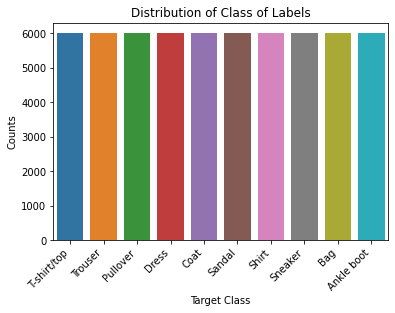

In [5]:
target_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sns.countplot(x=trainy)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)

plt.xticks(np.arange(len(target_labels)), target_labels)
plt.title('Distribution of Class of Labels')
plt.xlabel('Target Class')
plt.ylabel('Counts')

### - Checking for NULL Values

In [6]:
trainX_nan = np.isnan(np.sum(trainX))
testX_nan = np.isnan(np.sum(testX))
print(f'Training Set has NULL/ missing values: {trainX_nan}')
print(f'Testing Set has NULL/ missing values: {testX_nan}')

Training Set has NULL/ missing values: False
Testing Set has NULL/ missing values: False


### - Sample Class Images from the Dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


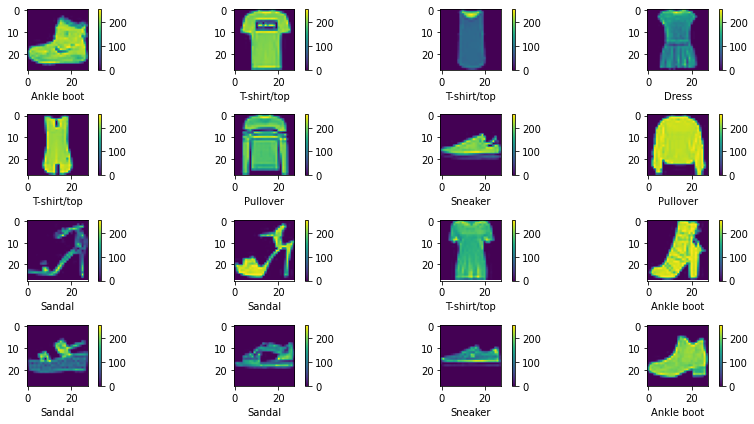

In [7]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

plt.figure(figsize=(12, 6))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i])
    plt.xlabel(target_labels[trainy[i]])
    plt.colorbar()

plt.tight_layout()
plt.show()

## Data Preprocessing

### - Re-Shaping the Feature Vector X

In [8]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

### - Re-scale the X and y values of the datasets

In [9]:
print('''
    \033[1mX - Feature Vector - 28 x 28 array of pixel values ranging from 0 to 255.\033[0m
    For faster convergence of the CNN model, we have to scale the range down to 0 to 1.
        The feature vector is still going to be a 28 x 28 pixel array, but its values are sclaed
        down to the range of 0 to 1
    
    \033[1mY - Target Vector - Single value in the range 0 to 9, which is the index of the target class.\033[0m
    As this is a multi-class classification problem, we are going to use a 
    SOFTMAX layer.
        - This is going to assign probabilities to each each class label and argmax is taken.
          For this, we need to perform ONE-HOT Encoding over the target vector
    For eg:
            Y = 2
                now changes to
            Y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    ''')


    X - Feature Vector - 28 x 28 array of pixel values ranging from 0 to 255.
    For faster convergence of the CNN model, we have to scale the range down to 0 to 1.
        The feature vector is still going to be a 28 x 28 pixel array, but its values are sclaed
        down to the range of 0 to 1
    
    Y - Target Vector - Single value in the range 0 to 9, which is the index of the target class.
    As this is a multi-class classification problem, we are going to use a 
    SOFTMAX layer.
        - This is going to assign probabilities to each each class label and argmax is taken.
          For this, we need to perform ONE-HOT Encoding over the target vector
    For eg:
            Y = 2
                now changes to
            Y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    


In [10]:
# Scaling feature vector
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [11]:
# One-Hot Encoding target vector
trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

## Model Building

### - Defining the layers of the CNN Model and their parameters

In [12]:
img_rows, img_cols = 28, 28
batch_size = 256
epochs = 15
input_shape = (img_rows, img_cols, 1)

# Define a Sequential Model
model = Sequential()

# The following layers are added to the above model

# First Block of Layers: CONV(32) ==> BN ==> MAX_POOL ==> DROPOUT
model.add( Conv2D(32, kernel_size=(3, 3), 
                  activation="relu", 
                  input_shape = input_shape
                 ))
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size = (2,2)) )
model.add( Dropout(rate = 0.25) )

# Second Block of Layers: CONV(64) ==> BN ==> MAX_POOL ==> DROPOUT
model.add( Conv2D(64, kernel_size=(3,3), 
                  activation="relu") )
model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size = (2,2)) )
model.add( Dropout(rate = 0.25) )

# Flattening the convolutional layers 
model.add(Flatten())

model.add( Dense(256, activation = "relu") )
model.add( Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### - Splitting into Training and Validation Sets

In [14]:
# Splitting sets as Training (80%) and Validation (20%)
trainX, trainy = shuffle(trainX, trainy)

k = (int)(0.2*len(trainX))
trainX, valX = trainX[k:], trainX[:k]
trainy, valy = trainy[k:], trainy[:k]

print("Shape of trainX, trainy: ", trainX.shape, trainy.shape)
print("Shape of valX, valy: ", valX.shape, valy.shape)

Shape of trainX, trainy:  (48000, 28, 28, 1) (48000, 10)
Shape of valX, valy:  (12000, 28, 28, 1) (12000, 10)


### - Model Fitting over the Training Data

In [15]:
history = model.fit(trainX, trainy, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose=1,
                    validation_data=(valX, valy))

Epoch 1/15
188/188 [==============================] - 33s 20ms/step - loss: 0.5414 - accuracy: 0.8120 - val_loss: 2.9692 - val_accuracy: 0.2097
Epoch 2/15
188/188 [==============================] - 3s 17ms/step - loss: 0.3469 - accuracy: 0.8714 - val_loss: 1.3690 - val_accuracy: 0.5820
Epoch 3/15
188/188 [==============================] - 3s 17ms/step - loss: 0.3007 - accuracy: 0.8890 - val_loss: 0.4103 - val_accuracy: 0.8492
Epoch 4/15
188/188 [==============================] - 3s 17ms/step - loss: 0.2686 - accuracy: 0.9003 - val_loss: 0.2952 - val_accuracy: 0.8901
Epoch 5/15
188/188 [==============================] - 3s 17ms/step - loss: 0.2537 - accuracy: 0.9059 - val_loss: 0.2628 - val_accuracy: 0.9063
Epoch 6/15
188/188 [==============================] - 3s 17ms/step - loss: 0.2332 - accuracy: 0.9125 - val_loss: 0.2811 - val_accuracy: 0.8989
Epoch 7/15
188/188 [==============================] - 3s 17ms/step - loss: 0.2122 - accuracy: 0.9196 - val_loss: 0.2521 - val_accuracy: 0.910

### - Model Training Results 

#### 1. Accuracy of Training and Validation sets

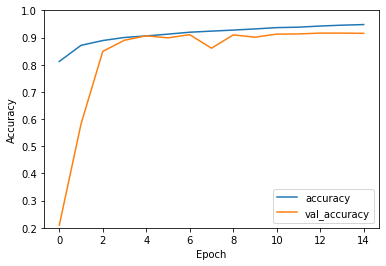

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

#### 2. Loss Values for Training and Validation Sets

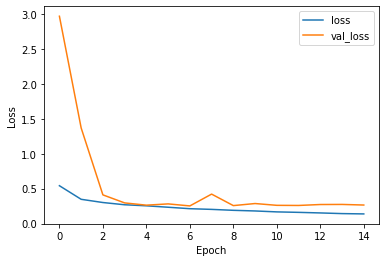

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

### - Model Testing over Testing Data set

In [18]:
test_loss, test_acc = model.evaluate(testX, testy)
print(f'\033[1mTesting Data Results: \033[0m')
print(f'\t Loss Value: {round(test_loss*100, 3)}%')
print(f'\t Accuracy Value: {round(test_acc*100, 3)}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2870 - accuracy: 0.9084
Testing Data Results: 
	 Loss Value: 28.702%
	 Accuracy Value: 90.84%


### - Predicting Samples using the CNN Model

In [19]:
pltX = testX.copy()
pltX = np.squeeze(pltX)

y_pred = model.predict(testX)

In [20]:
def plt_img(index):

  # Plotting the Test Image
  plt.title('{}th Test Case'.format(index))
  plt.xlabel('{}'.format(target_labels[np.argmax(y_pred[index])]))
  plt.imshow(pltX[index])
  plt.yticks([])
  plt.xticks([])

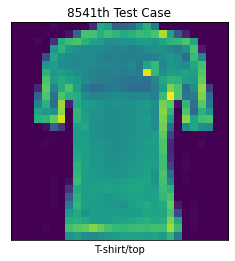

In [21]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

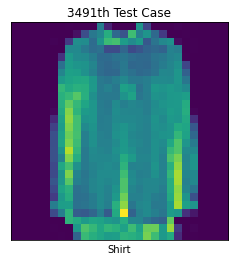

In [22]:
index = np.random.choice(np.arange(0, len(testy)))
plt_img(index)

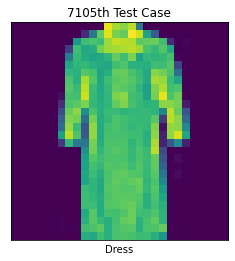

In [23]:
plt_img(7105)

In [24]:
y_pred = model.predict(testX)
testX_copy = testX.copy()

In [25]:
print("Final Classification Report")
print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1),
	target_names=target_labels))

Final Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.82      0.86      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.84      0.86      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.68      0.82      0.74      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



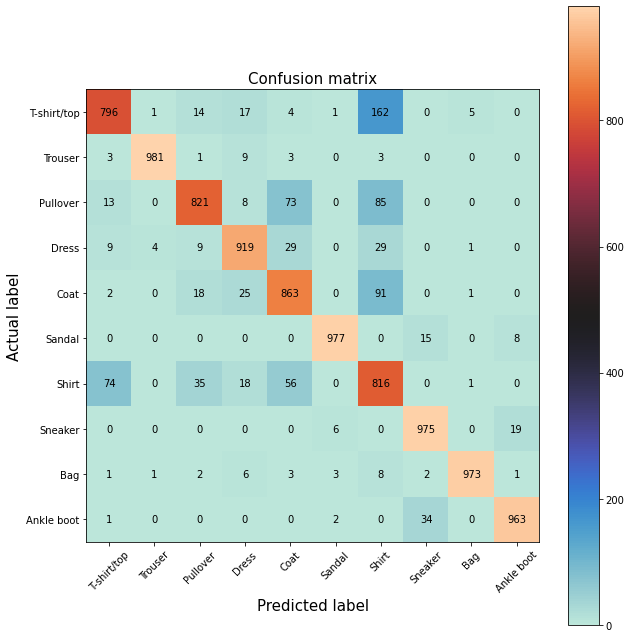

In [26]:
# Absolute Prediction and True labels 
preds = [np.argmax(x) for x in y_pred]
true = [np.argmax(x) for x in testy]

# Extracting the Confusion Matrix
cm = confusion_matrix(true, preds)

# Plotting the Confusion Matrix
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='icefire')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
plt.xticks(np.arange(10), target_labels, rotation=45, size = 10)
plt.yticks(np.arange(10), target_labels, size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)

# Filling in the values of the CM
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                     horizontalalignment='center',
                     verticalalignment='center')